In [ ]:
!nvidia-smi

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

**Step 02 # Import All the Requried Libraries**

In [2]:
from ultralytics import YOLO
from IPython.display import Image

**Step 03 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data="alphabet_dataset/data.yaml" model="YOLO11_alphabet.pt" epochs=50 imgsz=640

**Step 04 Examine Training Results**

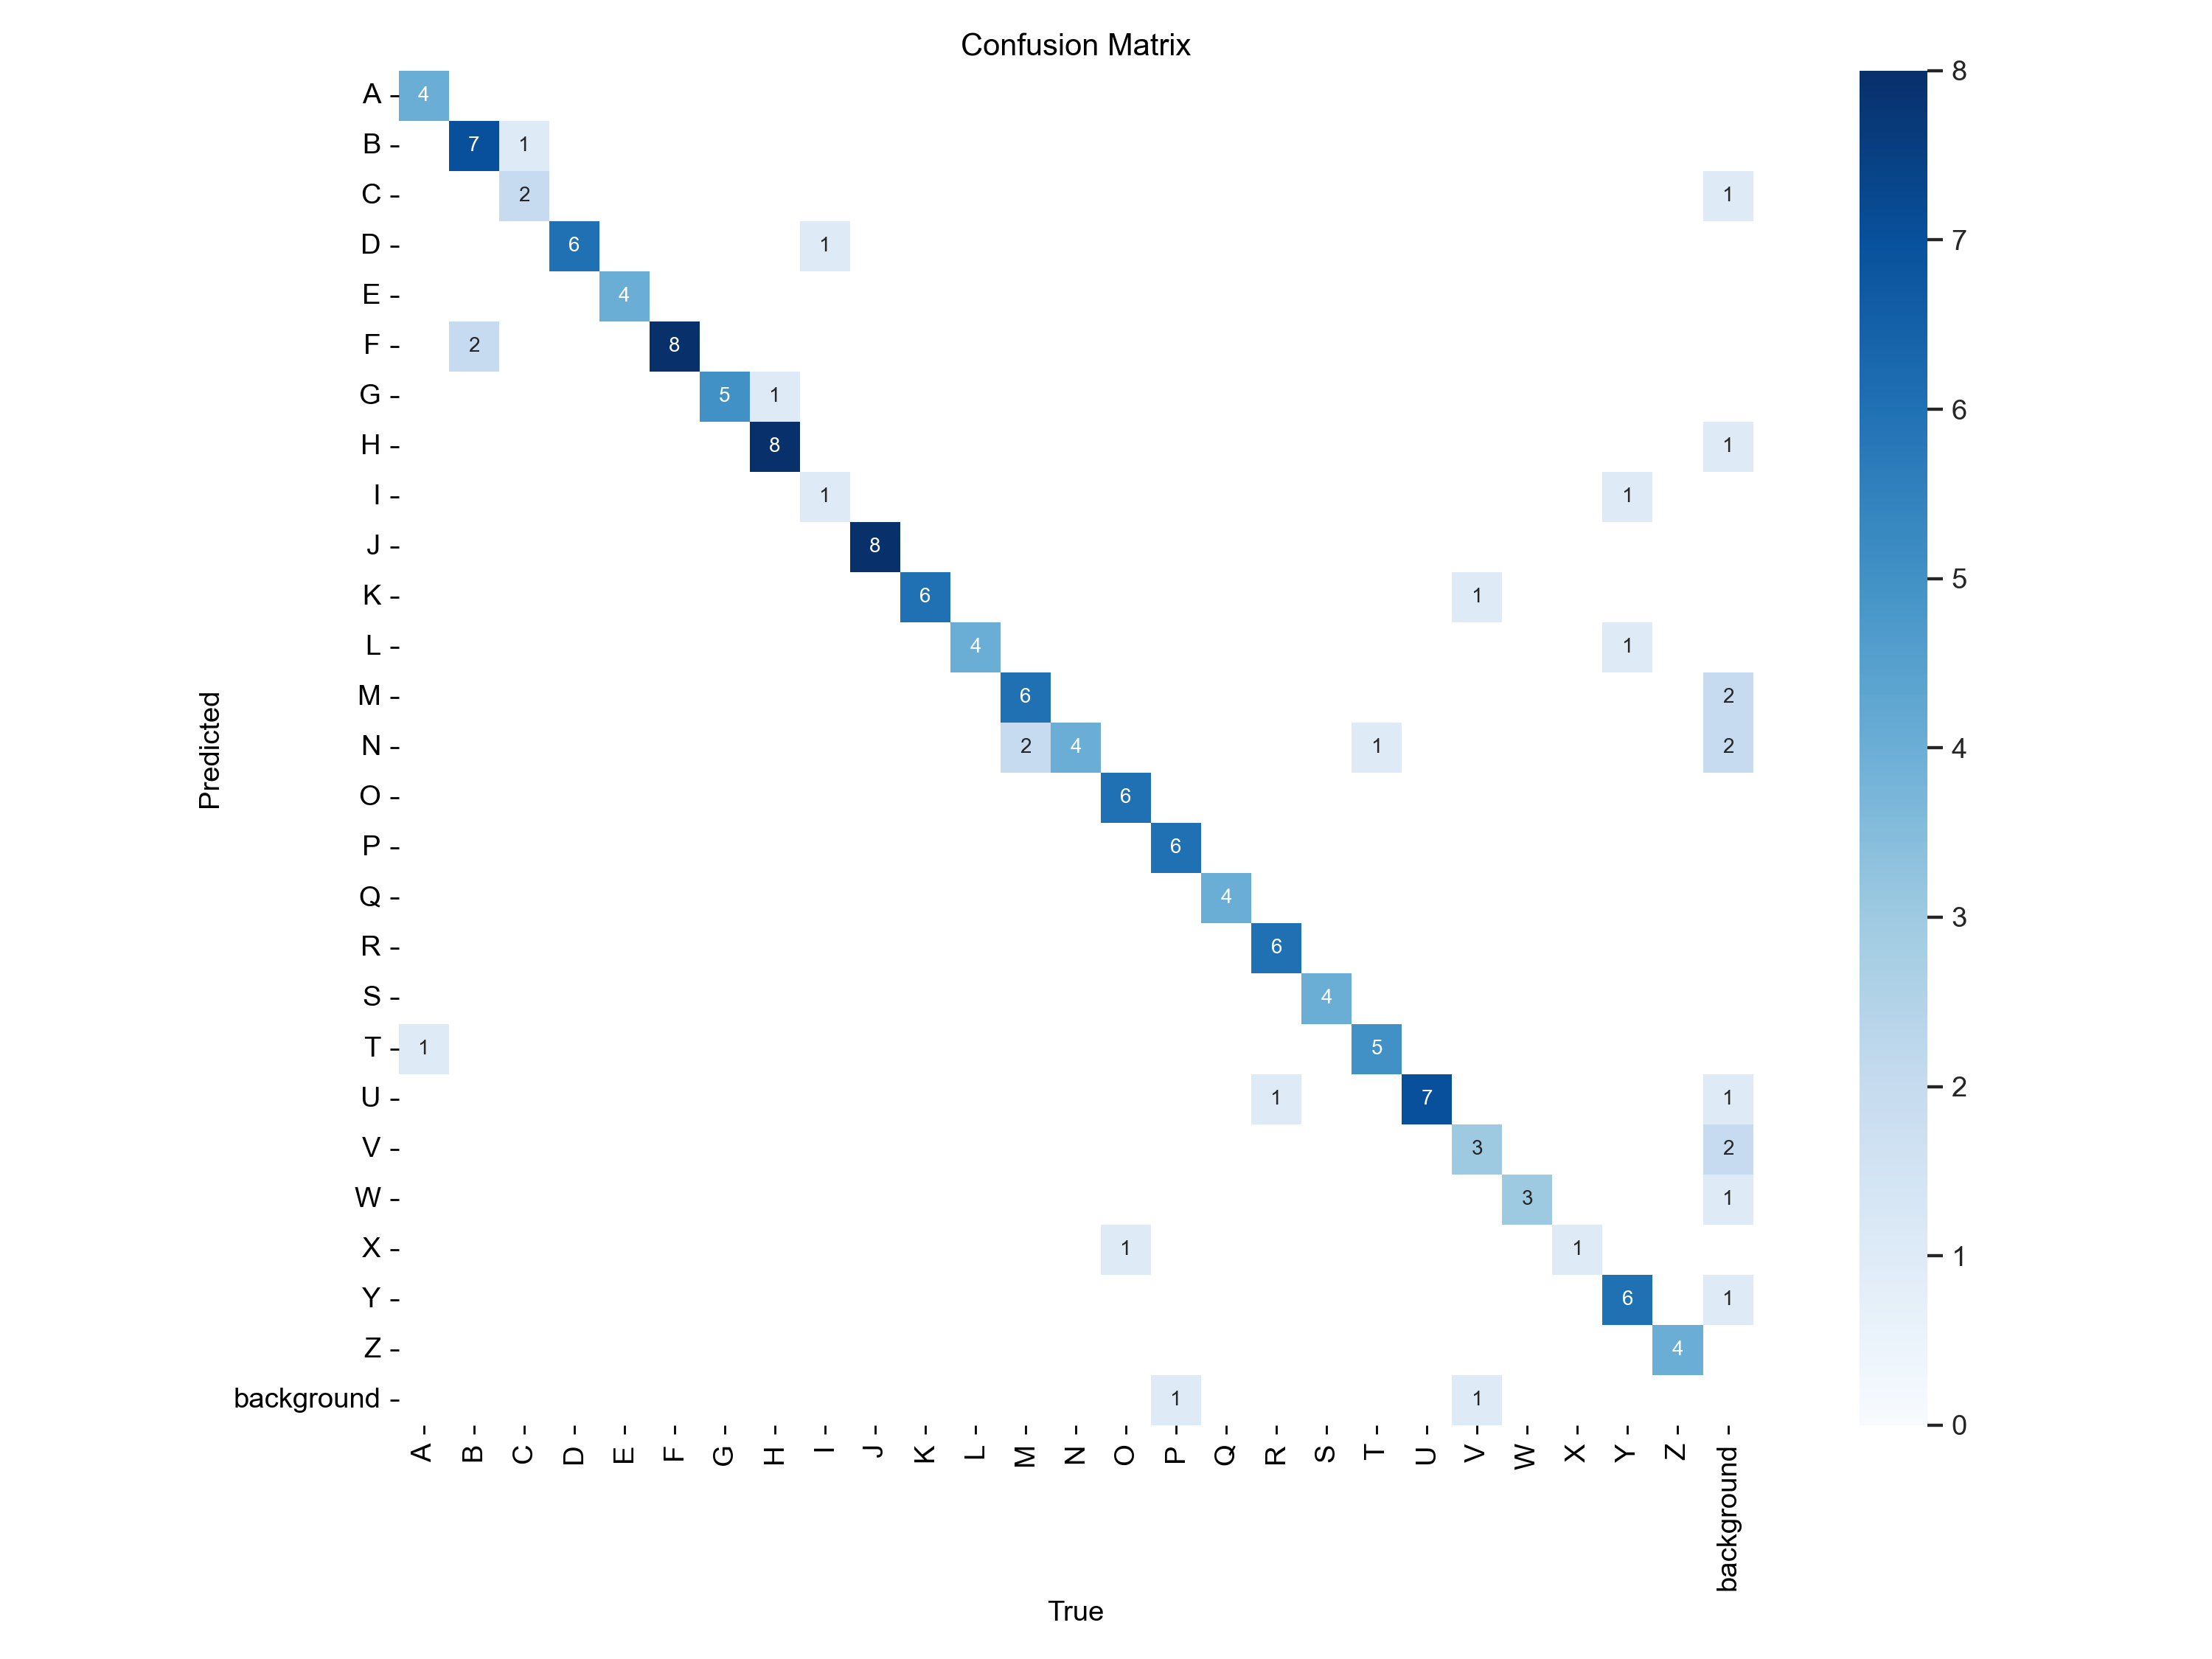

In [10]:
Image("runs/detect/train/confusion_matrix.png", width=600)

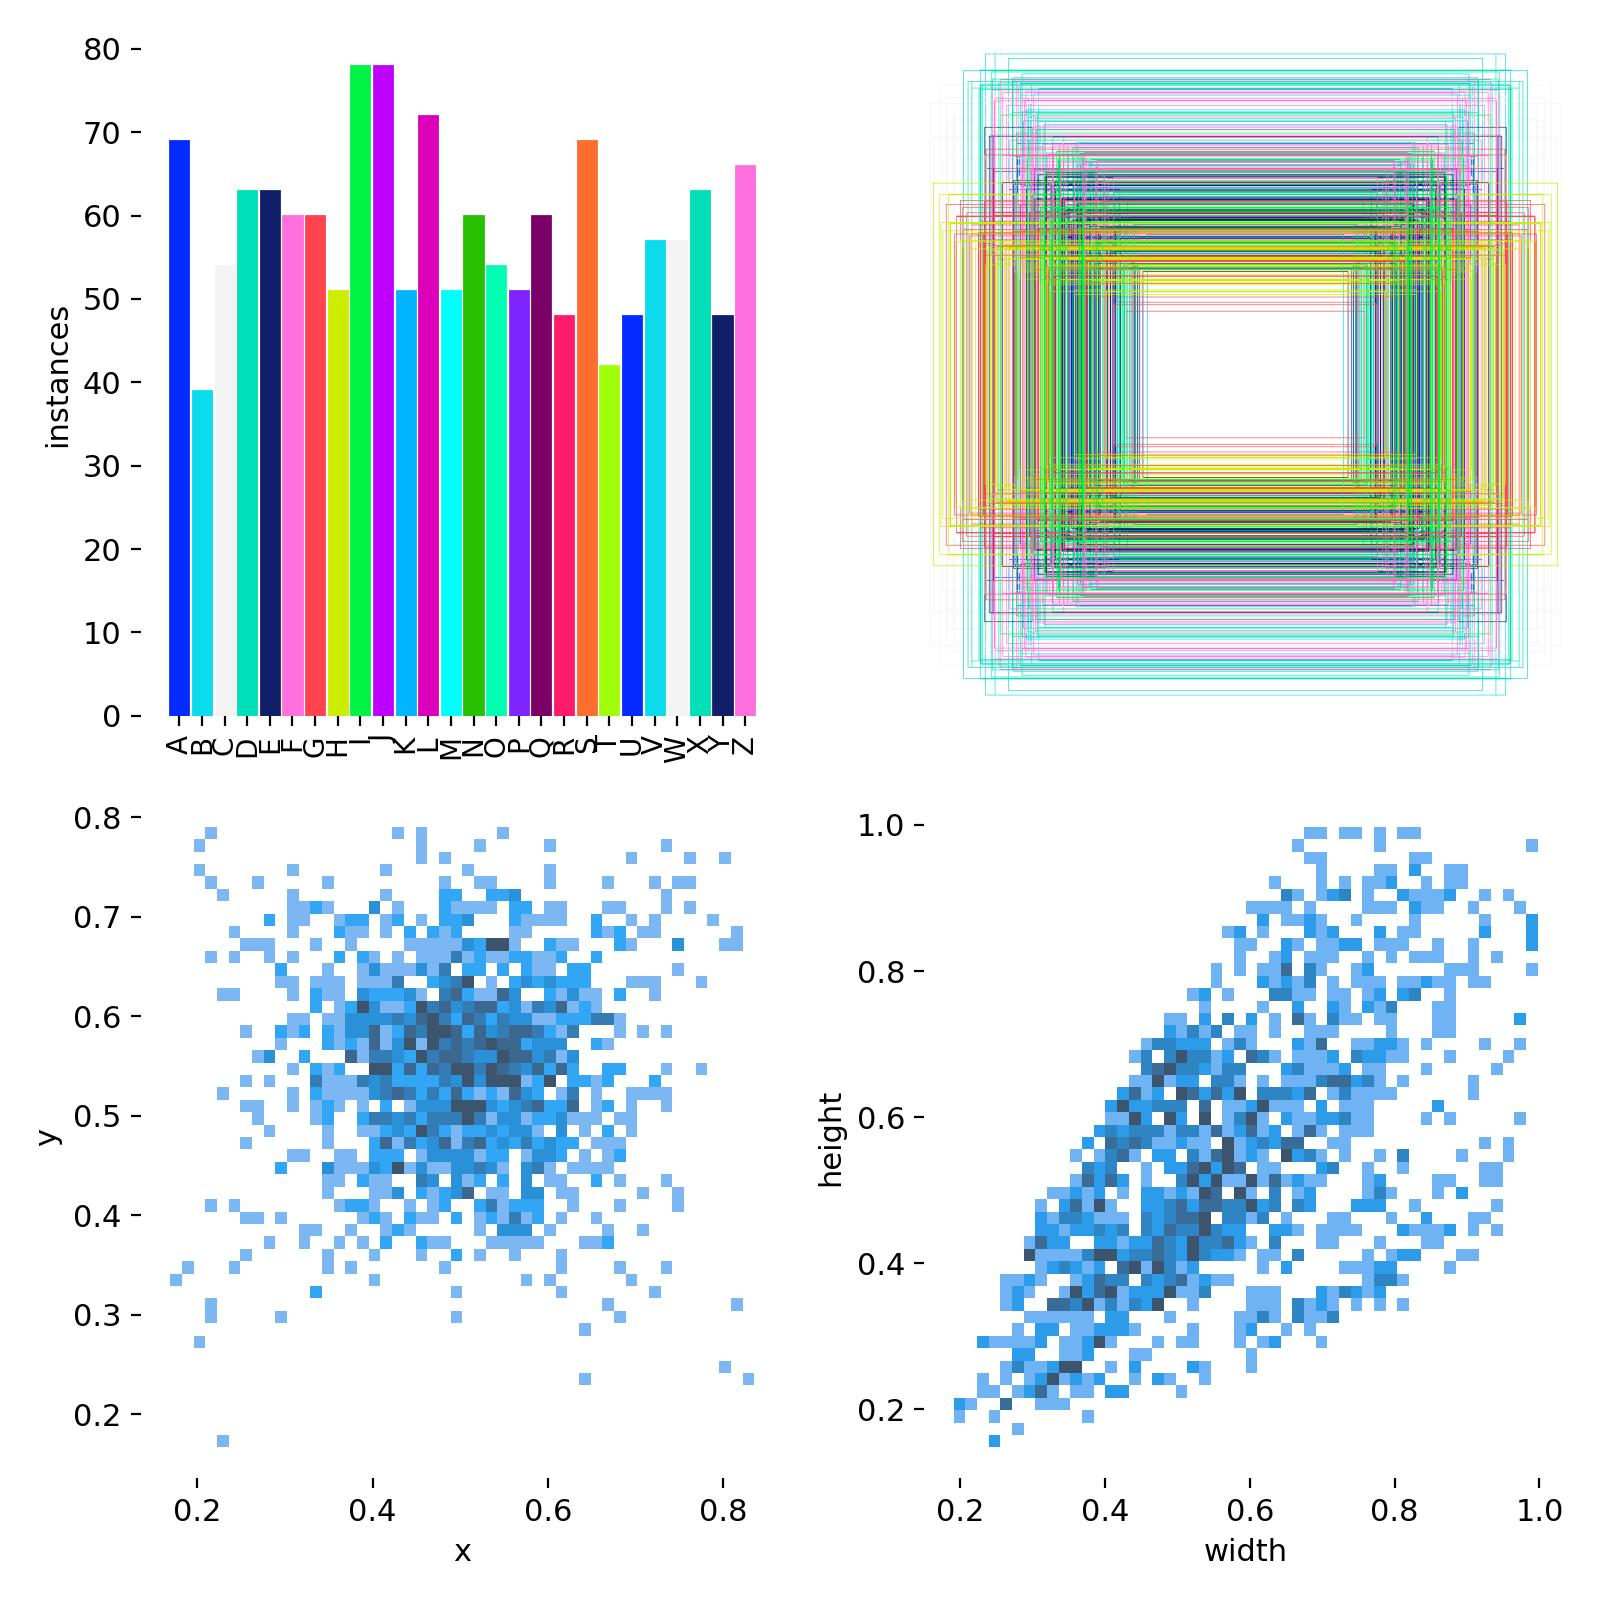

In [11]:
Image("runs/detect/train/labels.jpg", width=600)

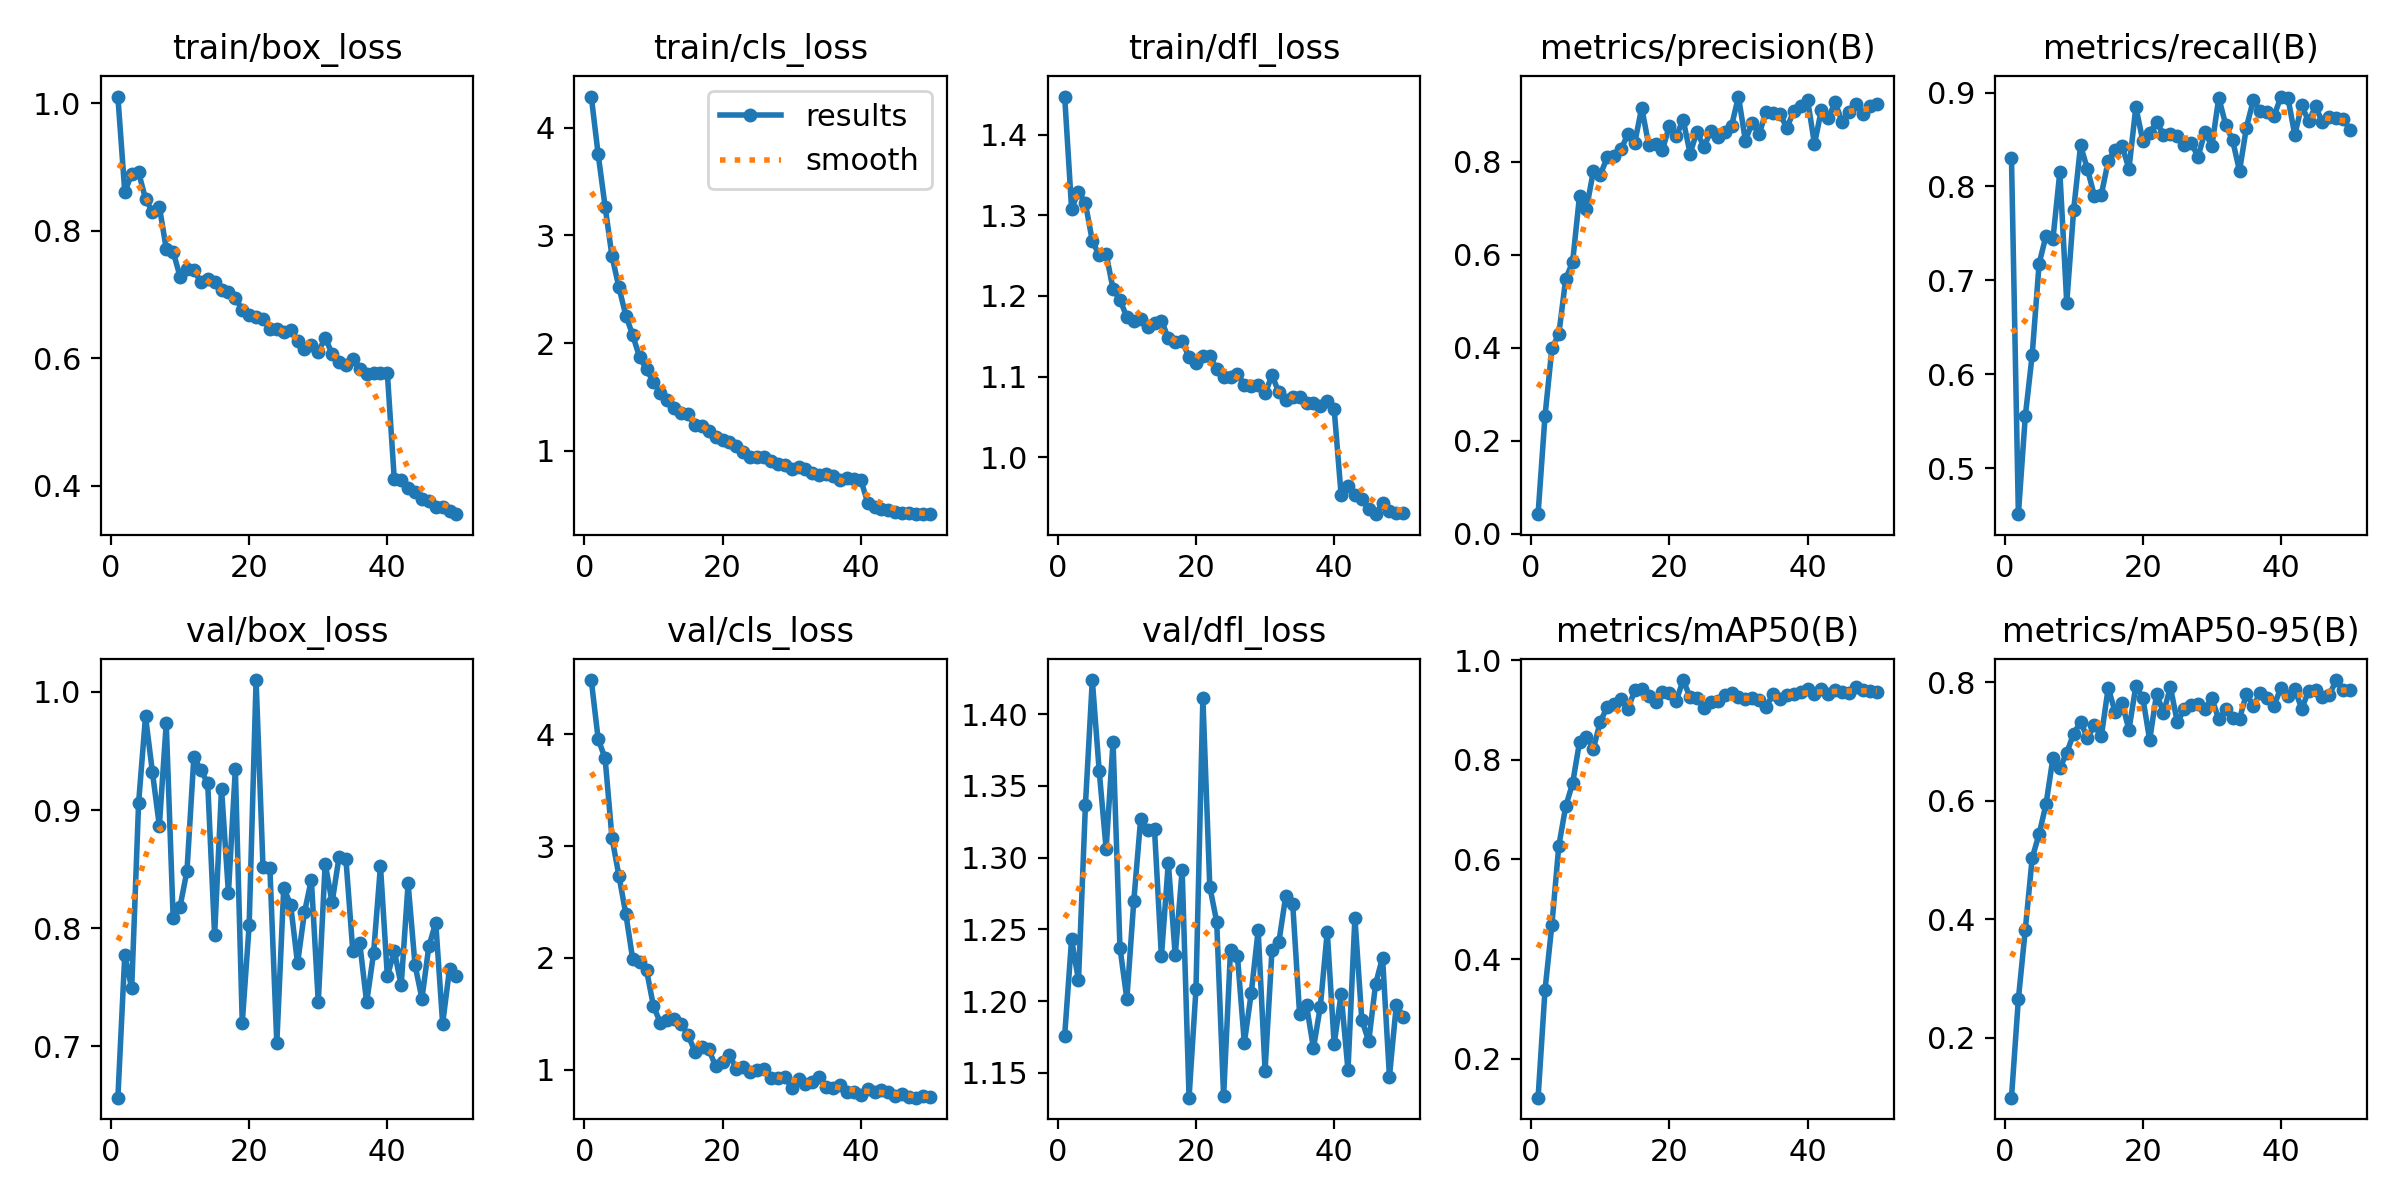

In [12]:
Image("runs/detect/train/results.png", width=600)

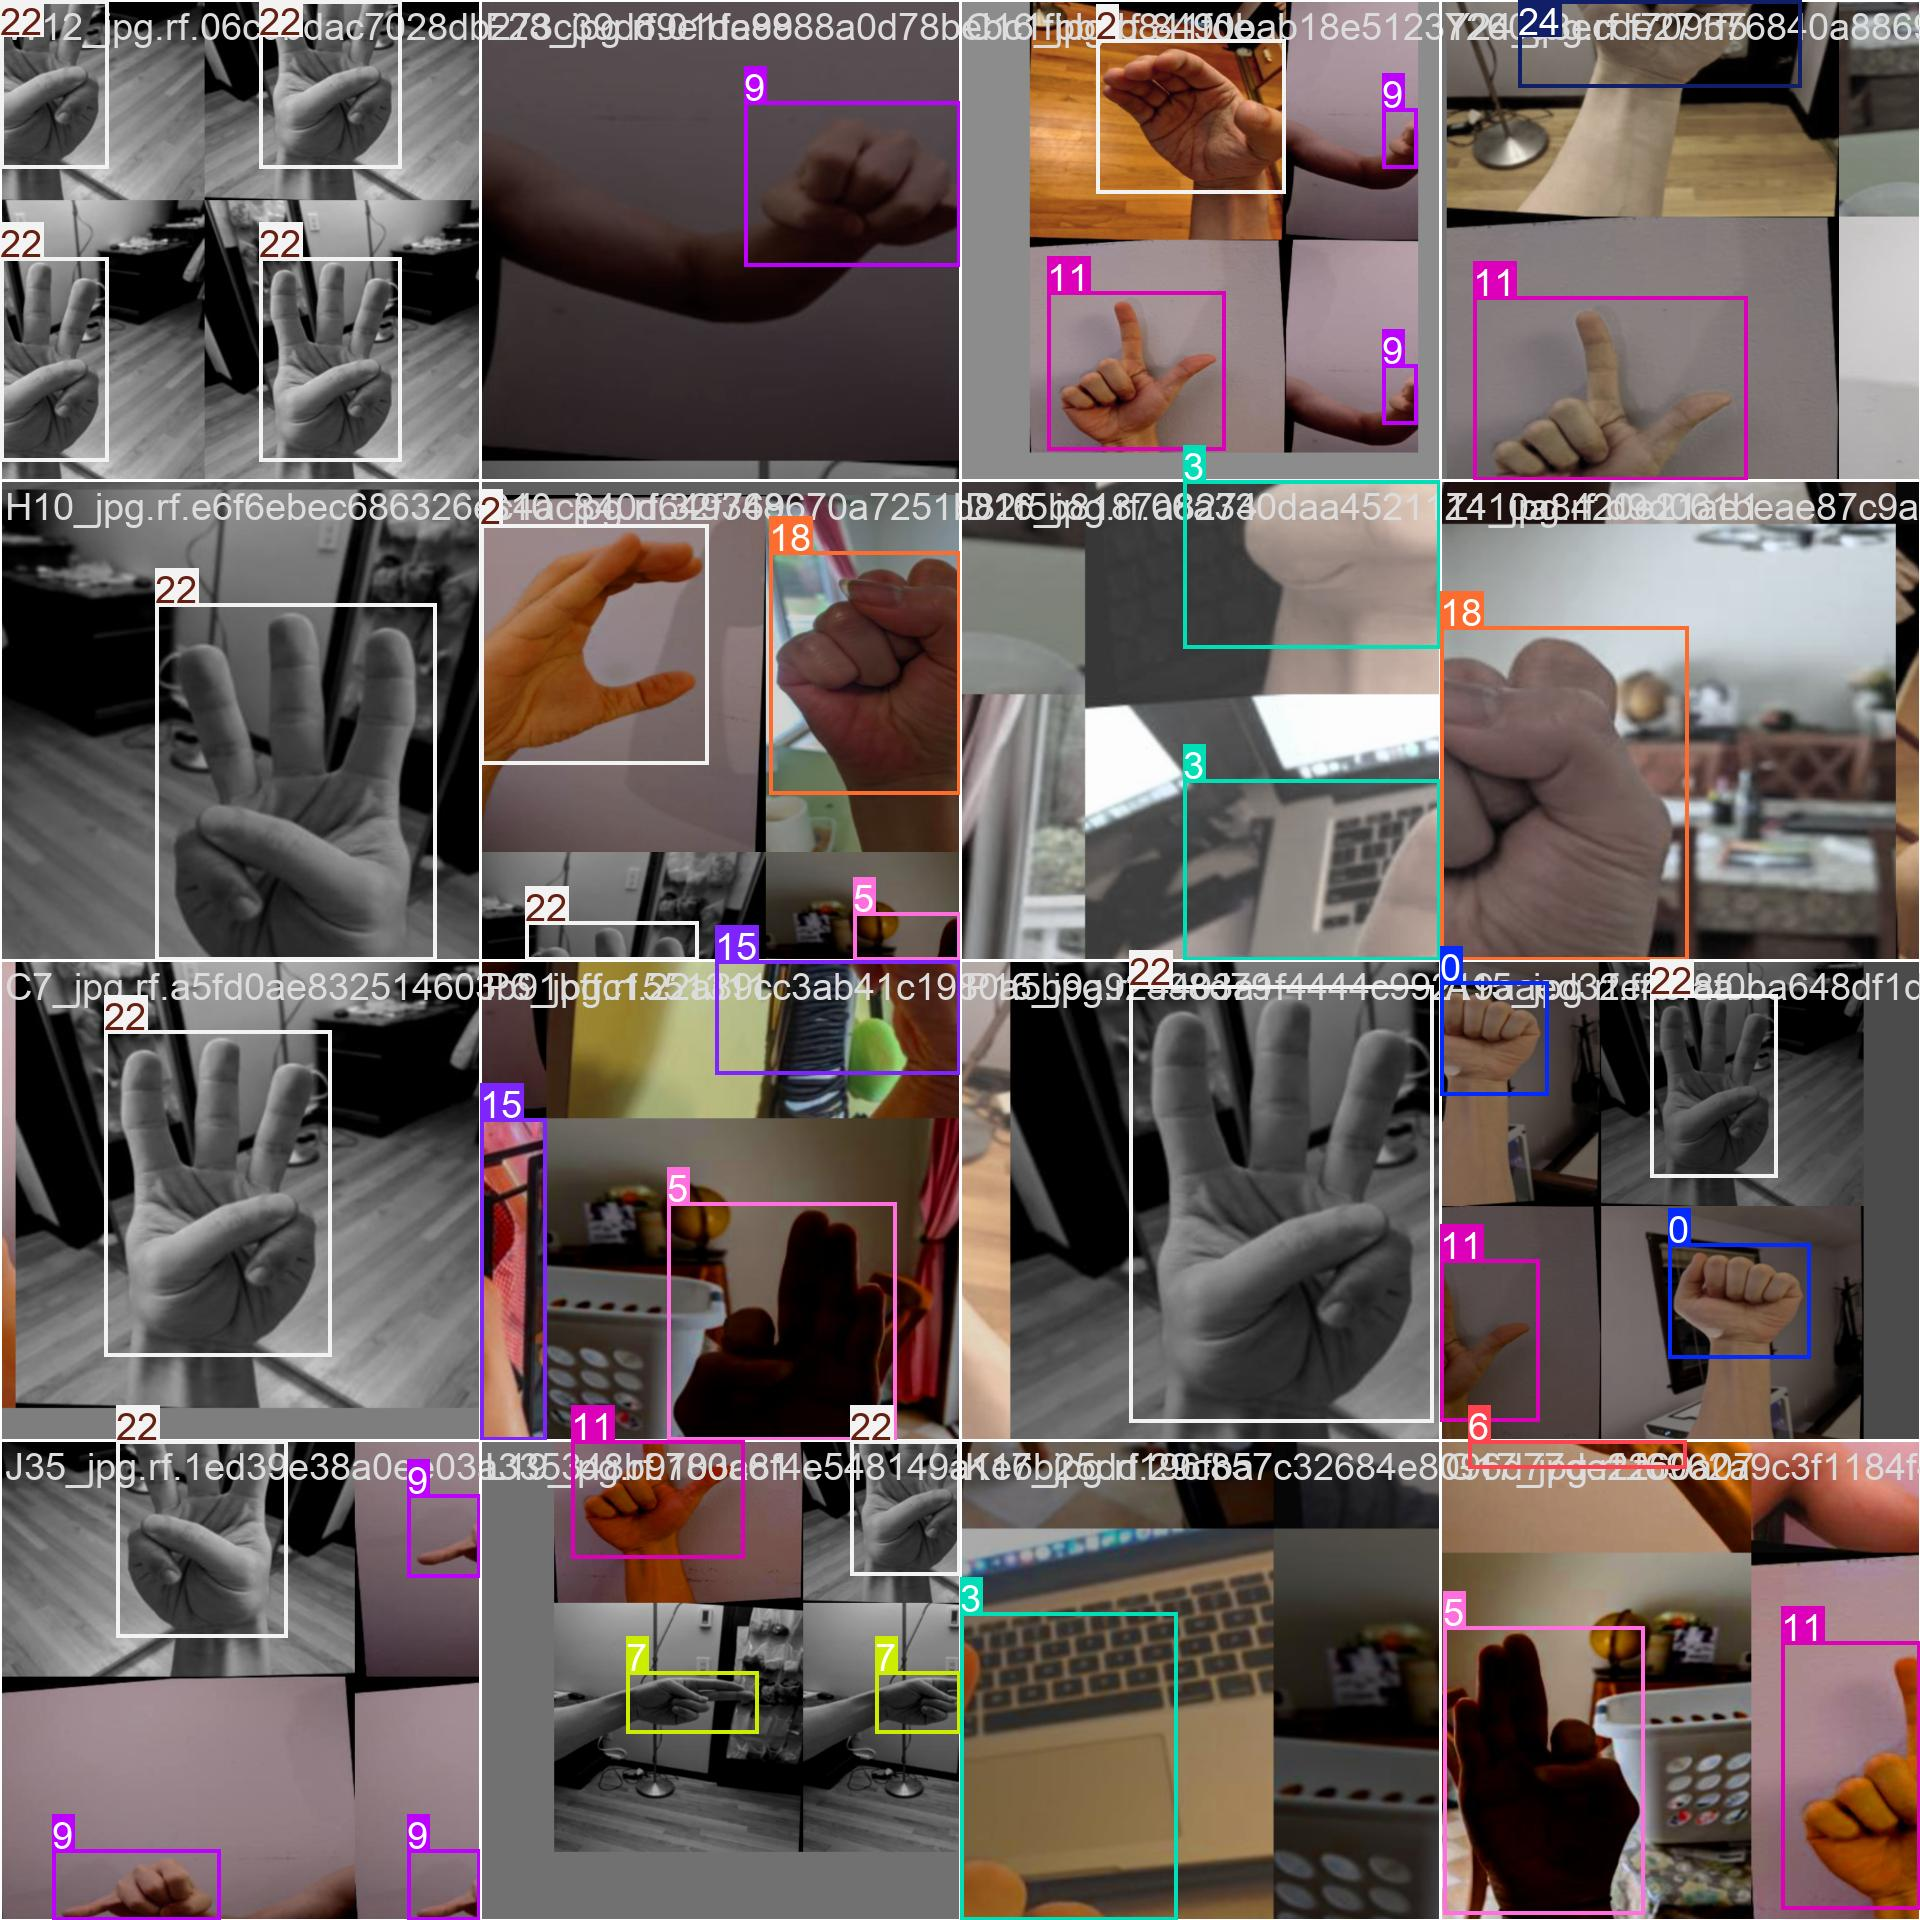

In [13]:
Image("runs/detect/train/train_batch0.jpg", width=600)

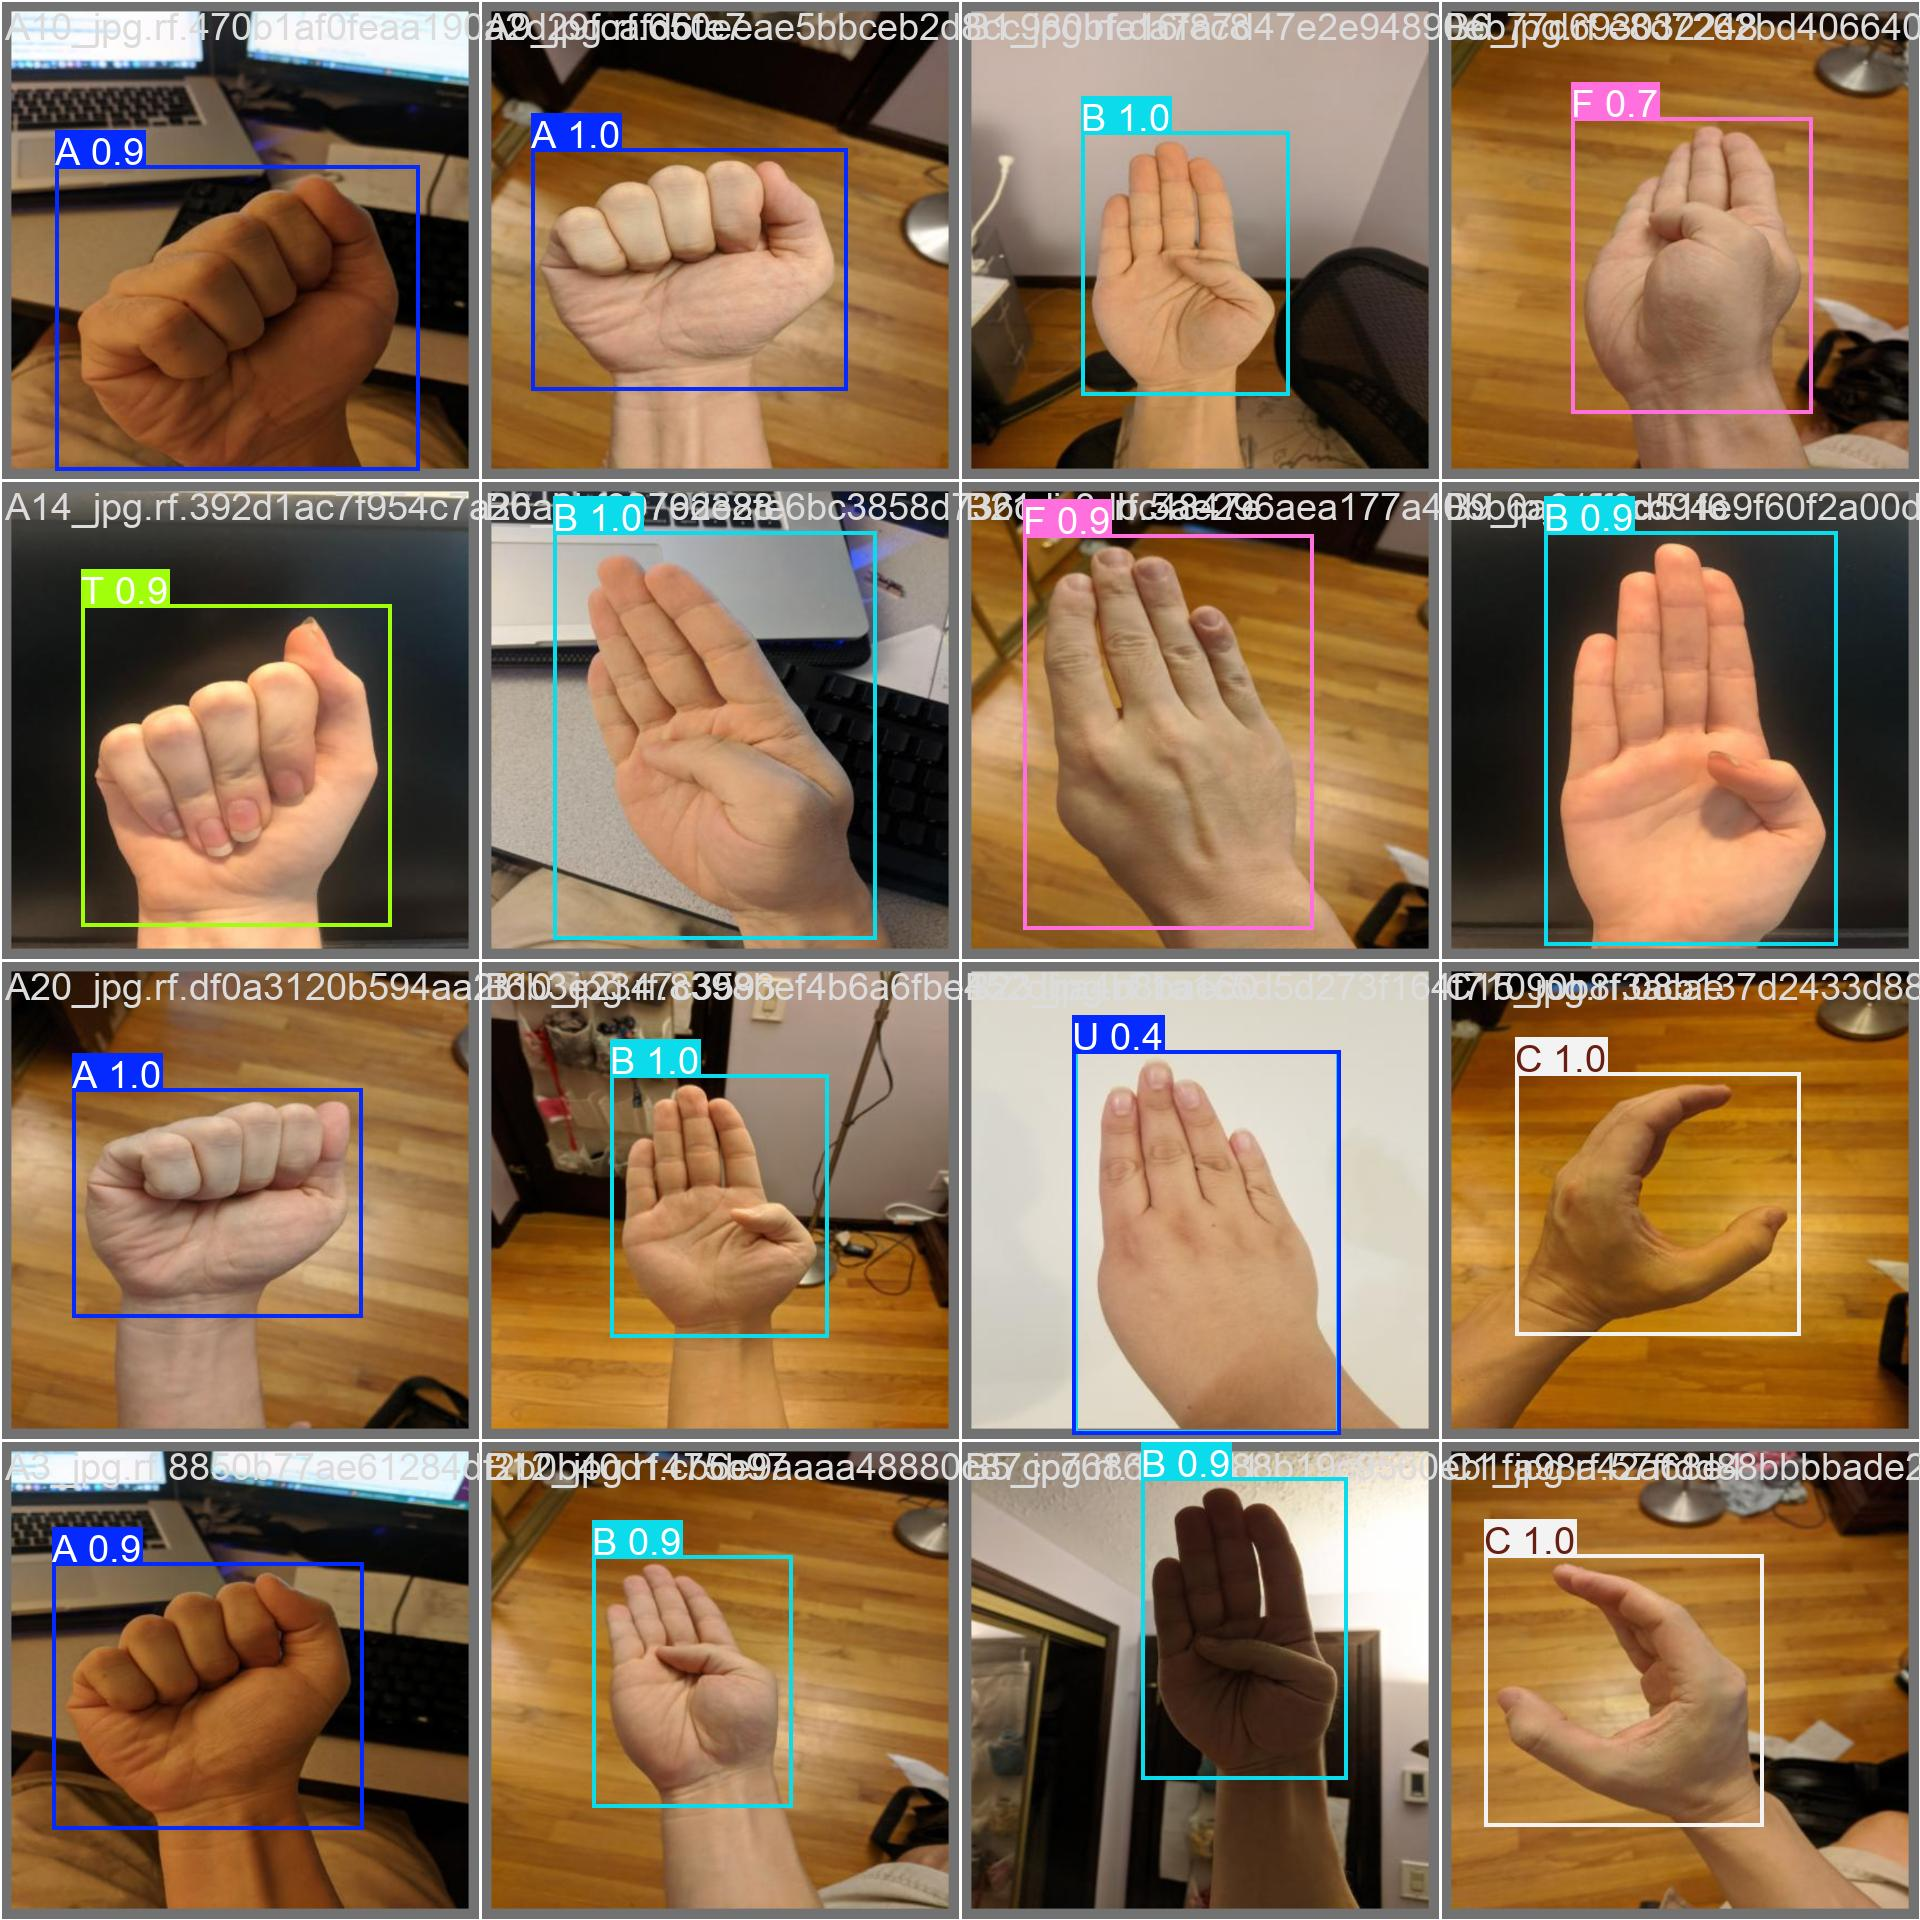

In [14]:
Image("runs/detect/train/val_batch0_pred.jpg", width=600)

**Step 05 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" conf=0.25 source="alphabet_dataset/test/images" save=True

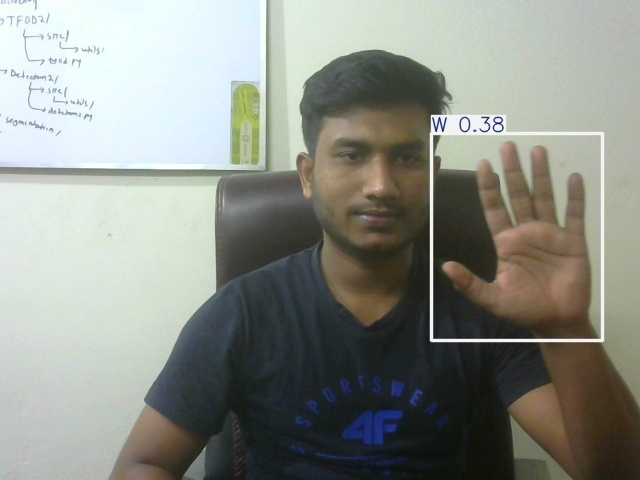

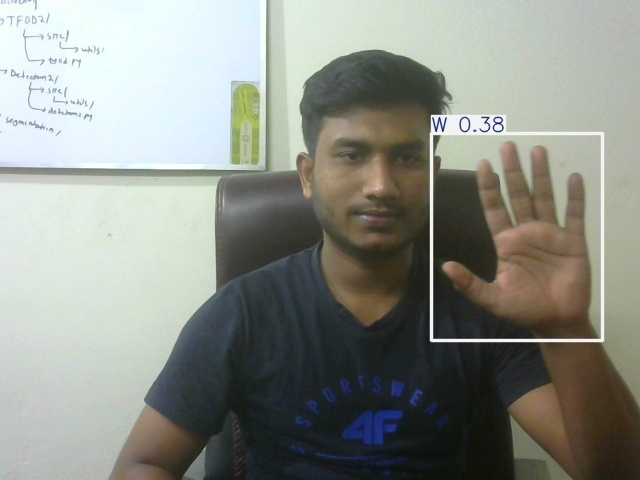

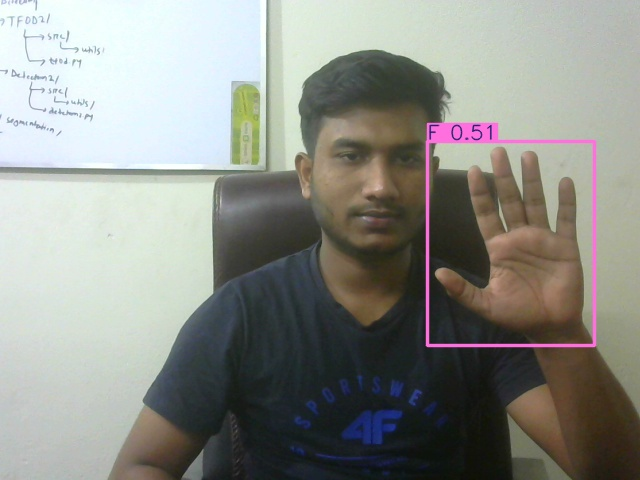

In [16]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= "runs/detect/train/weights/best.pt" conf=0.25 source="alphabet_dataset/test/images/Hello.82af5cd8-a6d1-11ec-a2fc-84a93ea18ae6.jpg" save=True

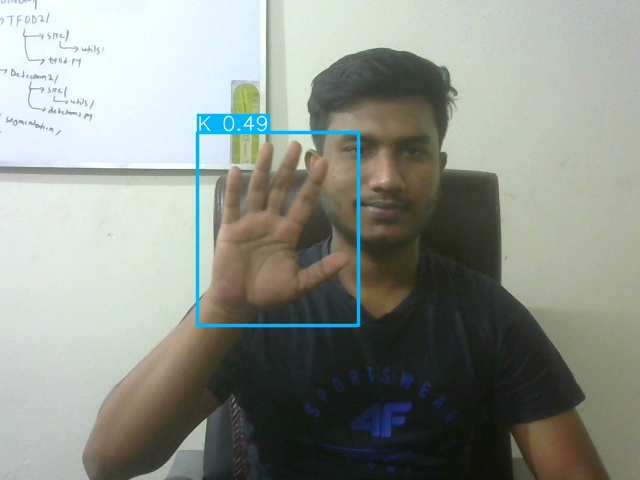

In [18]:
Image("runs/detect/predict2/Hello.82af5cd8-a6d1-11ec-a2fc-84a93ea18ae6.jpg", width=600)

**Step 06 Inference with Custom Model on Videos**

In [20]:
!yolo task=detect mode=predict model= "runs/detect/train/weights/best.pt" conf=0.25 source=0 save=True show=True

Ultralytics 8.3.119  Python-3.12.3 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
YOLO11n summary (fused): 100 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs

1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)

0: 480x640 (no detections), 764.7ms
0: 480x640 (no detections), 16.3ms
0: 480x640 (no detections), 13.2ms
0: 480x640 (no detections), 25.3ms
0: 480x640 (no detections), 17.7ms
0: 480x640 (no detections), 15.8ms
0: 480x640 (no detections), 25.0ms
0: 480x640 (no detections), 12.3ms
0: 480x640 (no detections), 19.7ms
0: 480x640 1 O, 13.4ms
0: 480x640 1 O, 12.0ms
0: 480x640 (no detections), 11.3ms
0: 480x640 1 N, 11.4ms
0: 480x640 (no detections), 12.2ms
0: 480x640 1 N, 12.3ms
0: 480x640 1 N, 12.1ms
0: 480x640 1 N, 11.4ms
0: 480x640 1 N, 11.6ms
0: 480x640 1 N, 12.4ms
0: 480x640 1 N, 1 O, 11.6ms
0: 480x640 1 E, 12.1ms
0: 480x640 1 N, 11.5ms
0: 480x640 (no detections), 11.8ms
0: 480x640 1 N, 11.5ms
0: 480x640 1 O, 12.7ms
0: 480x640 (no detections), 12.2m

In [ ]:
from ultralytics import YOLO
import cv2

model = YOLO('runs/detect/train/weights/best.pt')
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("X -Can't open the camera")
    exit()

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("X -Can't read the camera")
            break

        results = model.predict(source=frame, conf=0.25, save=False, show=True, verbose=False)

        # press 'q' to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    cap.release()
    cv2.destroyAllWindows()
    print("O -Already close the camera")

O -Already close the camera
